In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
file_path = '/content/drive/My Drive/_/CNN/FaceEyeDetection/'
img_path = file_path + '/Sudha_Murthy_ji.jpg'

In [18]:
from google.colab.patches import cv2_imshow  # Import cv2_imshow from colab patches

/content/drive/My Drive/Projects/CNN/FaceEyeDetection/images/Sudha_Murthy_ji.jpg


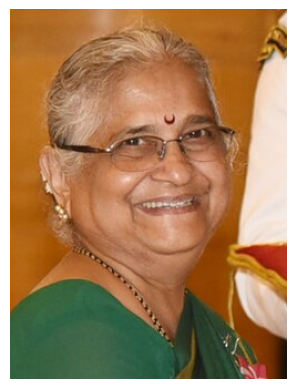

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

print(img_path)
img = cv2.imread(img_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using plt.imshow()
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis labels for cleaner display
plt.show()

## Face & Eye Detection using HAAR Cascade Classifiers

<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-27-ad48cf8b0916>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


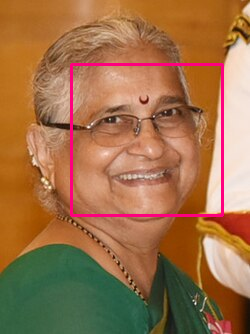

In [27]:
import numpy as np
import cv2

# We point OpenCV's CascadeClassifier function to where our
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('Haarcascade/haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2_imshow( image) # colab
    #cv2.imshow('Face Detection', image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

### Let's combine face and eye detection

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-30-c85803d5a5d8>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


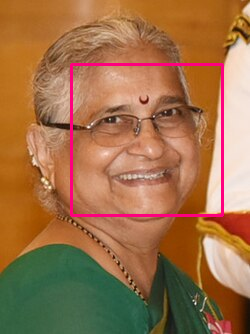

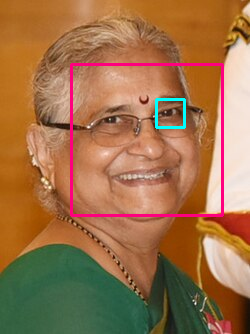

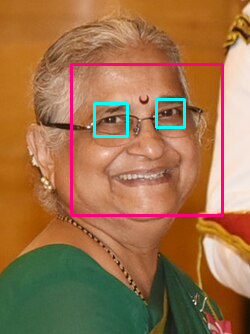

In [30]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('Haarcascade/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascade/haarcascade_eye.xml')

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2_imshow(img) # colab
    #cv2.imshow('img',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        cv2_imshow(img) # colab
        #cv2.imshow('img',img)
        cv2.waitKey(0)

cv2.destroyAllWindows()

### Let's make a live face & eye detection, keeping the face inview at all times

In [ ]:
# Face Recognition

# Importing the libraries
import cv2

# Loading the cascades
face_cascade = cv2.CascadeClassifier('Haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('Haarcascade/haarcascade_eye.xml')

# Defining a function that will do the detections
def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    return frame

# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame)
    cv2.imshow('Video', canvas)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()